In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

In [0]:
cd Colab\ Notebooks

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data loading and description

In [4]:
# loading
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.head())
print('\n')
print('\n')

# description
print(train_data.describe().transpose())

  File Type  Quality  Access Requests  Usage Requests  Status
0         B        1               11              61       1
1         B        1                2              40       1
2         B        1               27               1       1
3         B        1                0               0       0
4         B        1                2              88       1




                  count       mean        std  min   25%   50%   75%   max
Quality          2450.0   0.797959   0.401604  0.0   1.0   1.0   1.0   1.0
Access Requests  2450.0  21.866531  15.544603  0.0   7.0  22.0  35.0  49.0
Usage Requests   2450.0  43.508163  31.619654  0.0  14.0  43.0  71.0  99.0
Status           2450.0   0.631837   0.482404  0.0   0.0   1.0   1.0   1.0


# Data visualization

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


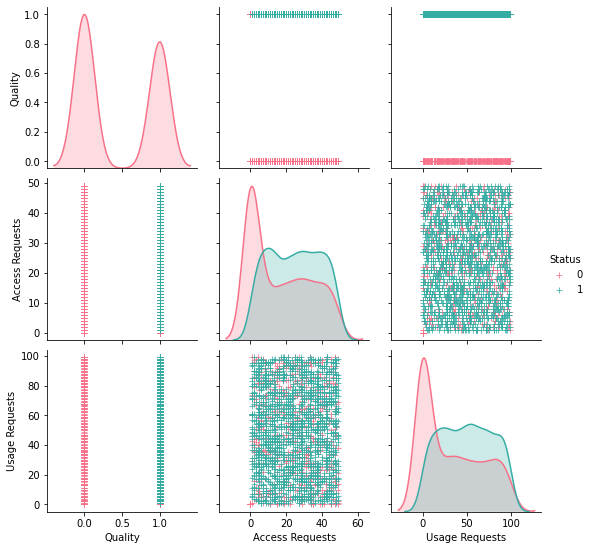

In [5]:
sns.pairplot(data= train_data,  hue = 'Status', palette = "husl", markers='+')

# Data preprocessing

In [0]:
def dummies_transform(x):
  """it will convert the categoricals variables in the data into numerical variables"""
  ftype = pd.get_dummies(x['File Type'], drop_first=True)
  dataset = pd.concat([x, ftype], axis = 1)
  dataset = dataset.drop('File Type', axis = 1)
  return dataset

In [7]:
# converting the categorical variables into numerical variables
train_data=dummies_transform(train_data)
test_data=dummies_transform(test_data)

# splitting the data into features and target
x_train = train_data.drop('Status', axis = 1)
y_train =  train_data['Status']

x_test = test_data.drop('Status', axis = 1)
y_test =  test_data['Status']

# scaling of the features
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(x_train)
Xtest = scaler.transform(x_test)

# checking of the datsets's shape
print('The shape of {} is : '.format('x_train dataset' ),x_train.shape)
print('The shape of {} is : '.format('x_test dataset' ),x_test.shape)
print('The shape of {} is : '.format('y_train dataset' ),y_train.shape)
print('The shape of {} is : '.format('y_test dataset' ),y_test.shape)

The shape of x_train dataset is :  (2450, 6)
The shape of x_test dataset is :  (1500, 6)
The shape of y_train dataset is :  (2450,)
The shape of y_test dataset is :  (1500,)


In [0]:
model = SVC(kernel= 'linear', C = 2)

In [0]:
history = model.fit(Xtrain, y_train)

In [10]:
predictions = model.predict(Xtest)

print(confusion_matrix(predictions, y_test))
print('\n')
classes = ['Cold', 'Hot']
print(classification_report(predictions, y_test, target_names=classes))

[[535  17]
 [  8 940]]


              precision    recall  f1-score   support

        Cold       0.99      0.97      0.98       552
         Hot       0.98      0.99      0.99       948

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500

